# This notebook is part of an analysis of the data before it's used to train the model. 

In [8]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing as mp
import pickle
import time

In [3]:
df = pd.read_pickle('merged.p')

In [5]:
#choosing random PWT_IDs to examine 
samples = np.random.choice(df.PWT__ID.unique(), 20)

100097423


/Users/krishankumar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


100055655
100253983
100054571
100031288
100078378
100017969
100253176
100264573
100029737
100085227
100281119
100042565
100063900
100238815
100301685
100079153
100163667
100115408
100232147


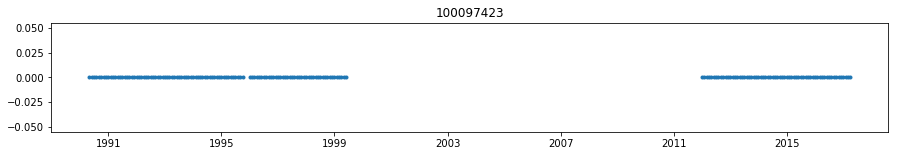

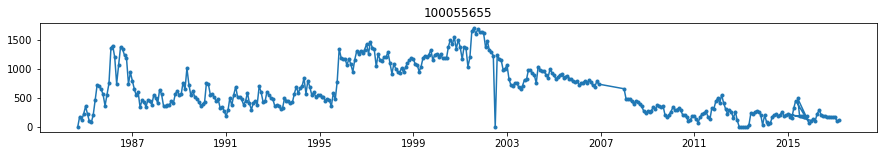

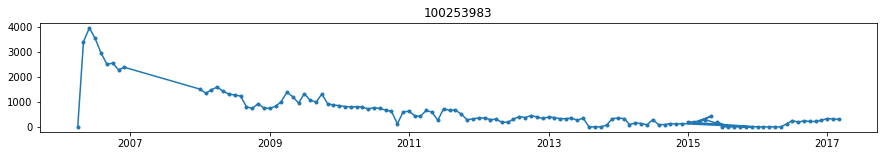

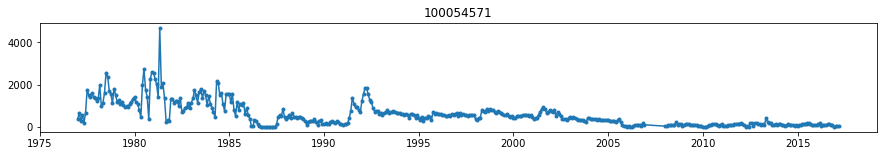

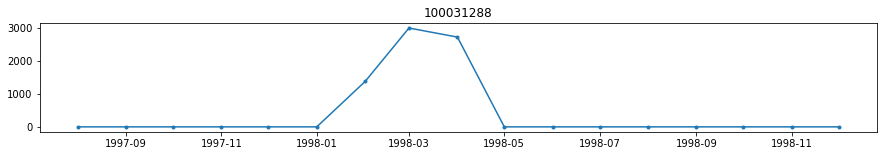

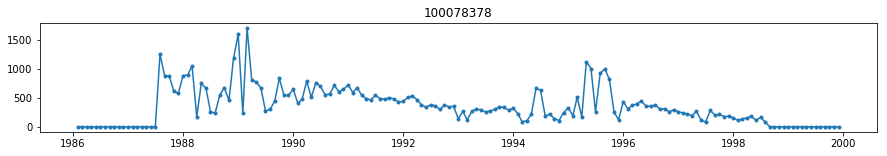

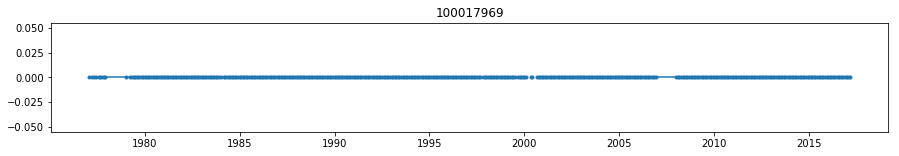

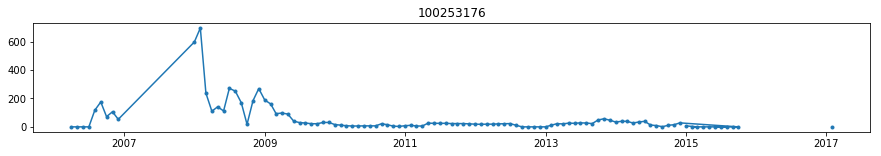

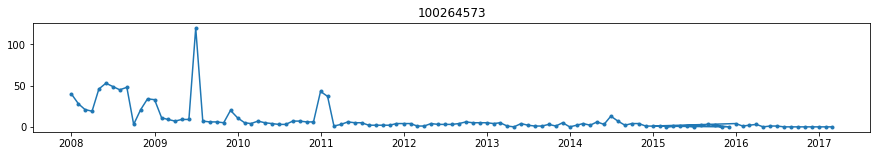

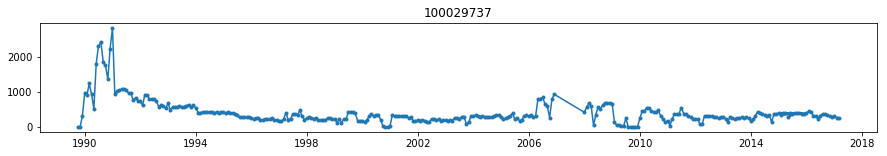

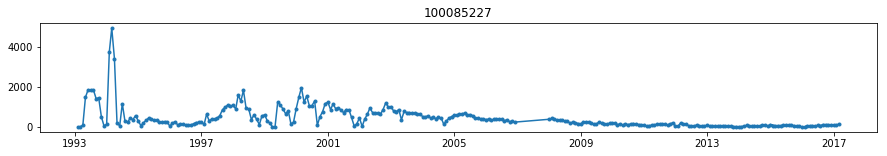

ValueError: ordinal must be >= 1

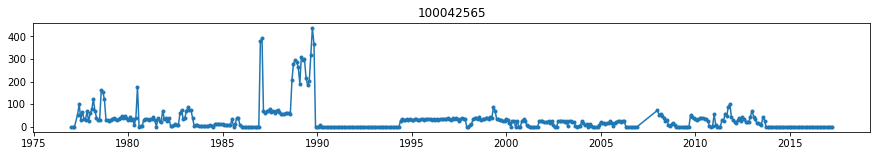

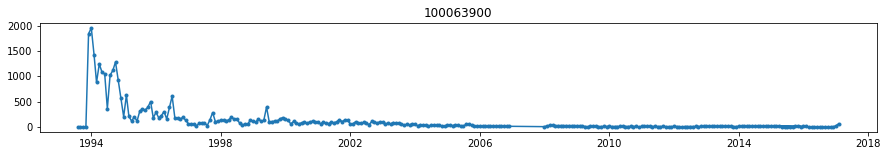

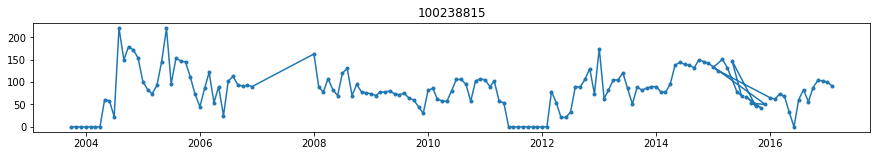

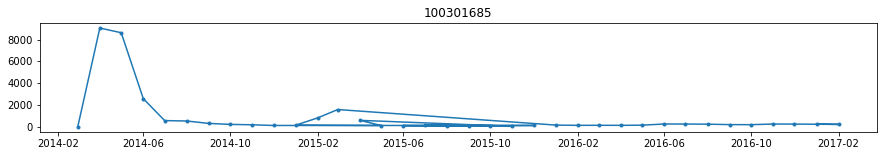

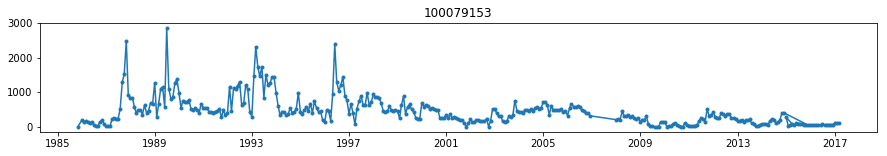

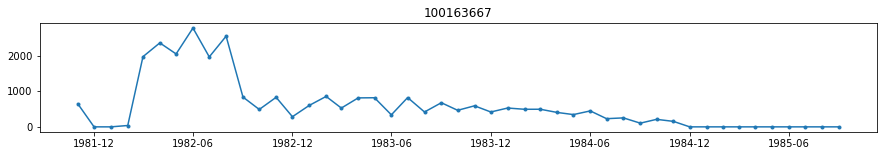

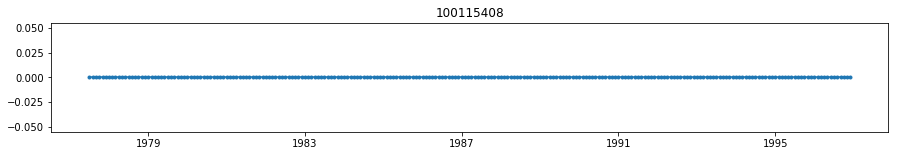

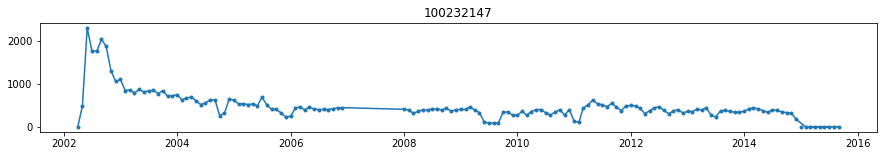

In [10]:
#plotting oil produced against production date to examine if the dates are in order 
for s in samples:
    print(s)
    dfi = df[df.PWT__ID == s]
    dfi['ProductionDate'] = pd.to_datetime(dfi['ProductionDate'])
    plt.figure(figsize = (15,2));
    plt.plot(pd.to_datetime(dfi.ProductionDate), dfi.OilorCondensateProduced.values, marker = '.')
    plt.title(str(s))

In [12]:
#Selecting one of these IDs to look at in depth. You can see the production months are out of order. 
df[df['PWT__ID'] == 100238815]

,PWT__ID,OilorCondensateProduced,ProductionDate,APINumber
23506316,100238815,0.0,10/1/2003,3022997
23582325,100238815,0.0,11/1/2003,3022997
23658452,100238815,0.0,12/1/2003,3022997
23732455,100238815,0.0,1/1/2004,3022997
23806603,100238815,0.0,2/1/2004,3022997
23880877,100238815,0.0,3/1/2004,3022997
23955447,100238815,0.0,4/1/2004,3022997
24030247,100238815,61.0,5/1/2004,3022997
24105254,100238815,58.0,6/1/2004,3022997
24180429,100238815,23.0,7/1/2004,3022997
